In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/trihalomethanes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Conductivity     3276 non-null   float64
 4   Turbidity        3276 non-null   float64
 5   Trihalomethanes  3276 non-null   float64
dtypes: float64(6)
memory usage: 153.7 KB


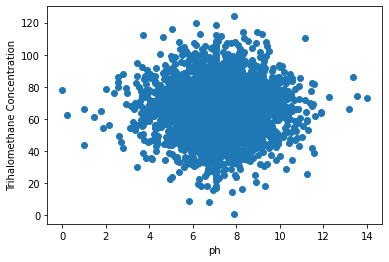

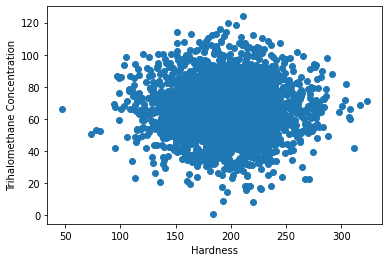

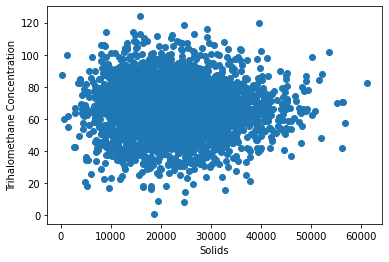

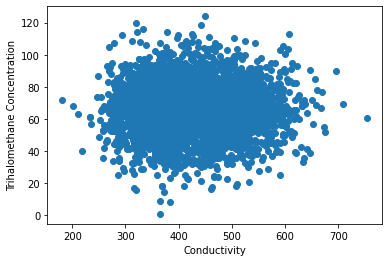

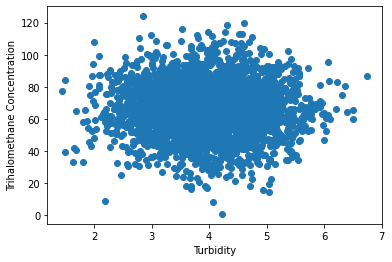

In [4]:
import matplotlib.pyplot as plt
for feature in range(len(df.columns)-1):
    plt.scatter(df[df.columns[feature]], df["Trihalomethanes"])
    plt.xlabel(df.columns[feature])
    plt.ylabel("Trihalomethane Concentration")
    plt.show()

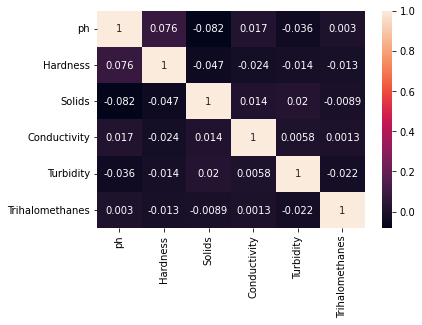

In [5]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
plt.show()

In [11]:
from pycaret.regression import *
regression = setup(df, target='Trihalomethanes', fold = 3)
best_model = compare_models()
regression_results = pull()
print(regression_results)

,Description,Value
0,Session id,1861
1,Target,Trihalomethanes
2,Target type,Regression
3,Original data shape,"(3276, 6)"
4,Transformed data shape,"(3276, 6)"
5,Transformed train set shape,"(2293, 6)"
6,Transformed test set shape,"(983, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,12.3890,254.9421,15.9609,-0.0016,0.2727,0.2578,0.5667
dummy,Dummy Regressor,12.3890,254.9421,15.9609,-0.0016,0.2727,0.2578,0.4233
br,Bayesian Ridge,12.4135,255.5403,15.9803,-0.0042,0.2731,0.2583,0.5167
omp,Orthogonal Matching Pursuit,12.4384,255.8332,15.9895,-0.0054,0.2731,0.2586,0.5900
lasso,Lasso Regression,12.4386,256.0532,15.9968,-0.0063,0.2733,0.2588,1.2367
lr,Linear Regression,12.4475,256.0546,15.9971,-0.0064,0.2733,0.2590,2.0200
ridge,Ridge Regression,12.4474,256.0545,15.9970,-0.0064,0.2733,0.2590,1.0333
en,Elastic Net,12.4396,256.0678,15.9972,-0.0064,0.2733,0.2589,0.5100
lar,Least Angle Regression,12.4475,256.0546,15.9971,-0.0064,0.2733,0.2590,0.6267
ada,AdaBoost Regressor,12.6115,259.7076,16.1115,-0.0210,0.2742,0.2604,0.5867


                                    Model      MAE        MSE     RMSE  \
llar         Lasso Least Angle Regression  12.3890   254.9421  15.9609   
dummy                     Dummy Regressor  12.3890   254.9421  15.9609   
br                         Bayesian Ridge  12.4135   255.5403  15.9803   
omp           Orthogonal Matching Pursuit  12.4384   255.8332  15.9895   
lasso                    Lasso Regression  12.4386   256.0532  15.9968   
lr                      Linear Regression  12.4475   256.0546  15.9971   
ridge                    Ridge Regression  12.4474   256.0545  15.9970   
en                            Elastic Net  12.4396   256.0678  15.9972   
lar                Least Angle Regression  12.4475   256.0546  15.9971   
ada                    AdaBoost Regressor  12.6115   259.7076  16.1115   
gbr           Gradient Boosting Regressor  12.9220   272.1911  16.4935   
rf                Random Forest Regressor  13.0443   278.4606  16.6820   
et                  Extra Trees Regres

In [7]:
import pickle 
pickle.dump(best_model, open("Models/Trihalomethanes_Regressor.pkl", "wb"))

In [8]:
final_best = finalize_model(best_model)
save_model(final_best, 'Trihalomethanes_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Lenovo\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['ph', 'Hardness', 'Solids',
                                              'Conductivity', 'Turbidity'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator', LassoLars(random_state=6353))]),
 'Trihalomethanes_pipeline.pkl')